# Introducción a la Programación en JULIA 
## Notebook 6

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

## Contenidos

- [Aplicaciones I](#6.-Aplicaciones-I)
    - [Modelo Insumo Producto](#6.1-Modelo-Insumo-Producto)
    - [Equilibrio de Mercado con Dos Bienes](#6.2-Equilibrio-de-Mercado-con-Dos-Bienes)
    - [Mínimos Cuadrados Ordinarios](#6.3-M%C3%ADnimos-Cuadrados-Ordinarios)

## 6. Aplicaciones I

Cargamos lo paquetes necesarios: 

In [1]:
using LinearAlgebra
using DelimitedFiles
using Plots

### 6.1 Modelo Insumo-Producto 

*Aplicación tomada del libro "Matemática para Economistas con Excel y Matlab" de Alicia Bernardello y coautores*

Características del modelo:

- Describe relaciones interindustriales o intersectoriales.
- Usa dichas relaciones para predecir cambios en la demanda para predecir causados por cambios en la demanda autónoma del los productos finales.

Suponga una economía con tres sectores: 


| Prod/Ins |  I  |  II |  III |
|--------------|--------|-----|------|
|  I           |0.2  |0.6  |0     |
|  II          |0.2  |0    |0.2   |
|  III         |0.4  |0.2  |0.5   |

- Columna 1: Por cada peso producido del producto I se usan: 0.2 pesos del mismo producto, 0.2 pesos del producto II, y 0.4 pesos del producto III.
- La demanda de cada una de las tres industrias está compuesta de la demanda derivada de las otras industrias y la demanda autónoma:

\begin{eqnarray}
x_1 &=& 0.2x_1+0.6x_2+d_1 \\ 
x_2 &=& 0.2x_1+0.2x_3+d_2 \\ 
x_3 &=& 0.4x_1+0.2x_2+0.5x_3+d_3 \\
\end{eqnarray}

- Definamos la matriz de coeficientes técnicos como:

In [2]:
A = [0.2 0.6 0; 0.2 0 0.2; 0.4 0.2 0.5]

3×3 Array{Float64,2}:
 0.2  0.6  0.0
 0.2  0.0  0.2
 0.4  0.2  0.5

- Si definimos los vectores $x=(x_1,x_2,x_3)'$ y $d=(d_1,d_2,d_3)'$ tenemos:

$$x = Ax + d$$

- Entonces:

$$x=(I-A)^{-1}d$$

- La matriz $I-A$ es denominada matriz de Leontief.
- La matriz $A$ tiene todo sus autovalores en el círculo unitario y $I-A$ es no singular. Entonces $(I-A)^{-1}$ es no negativa.

In [3]:
eigA, autvalA = eigen(A);

In [4]:
eigA

3-element Array{Float64,1}:
 -0.18765844602992152
  0.14315036673345607
  0.7445080792964658

In [5]:
autvalA

3×3 Array{Float64,2}:
  0.797453  -0.68212    -0.365644
 -0.515232   0.0646304  -0.331827
 -0.314014   0.728379   -0.869595

In [6]:
Identity = Matrix{Int64}(I, 3, 3)
detL = det(Identity-A)

0.26

Como esperábamos:

In [7]:
invL = inv(Identity-A)

3×3 Array{Float64,2}:
 1.76923   1.15385  0.461538
 0.692308  1.53846  0.615385
 1.69231   1.53846  2.61538

- Si $d_1=100$, $d_2=50$, y $d_3=200$, las demandas sectoriales serían:

In [8]:
d = [100; 50; 200];
x = invL*d

3-element Array{Float64,1}:
 326.9230769230769
 269.2307692307692
 769.2307692307693

- Nos interesa calcular el efecto de un cambio en la demanda autónoma de un producto sobre la demanda total (dadas las relaciones entre sectores).

$$\Delta x = (I-A)^{-1} \Delta d$$

- Suponga ahora $d'_1=110$, $d'_2=100$, y $d'_3=180$. Entonces el cambio en la producción será:

In [9]:
Dd = [10; 0; 0];
Dx = invL*Dd

3-element Array{Float64,1}:
 17.692307692307693
  6.923076923076923
 16.923076923076923

### 6.2 Equilibrio de Mercado con Dos Bienes

*Aplicación tomada del libro "Matemática para Economistas con Excel y Matlab" de Alicia Bernardello y coautores*

El Modelo:

- Función de Demanda del producto 1: $$Q_{d1} = 40 - 2 P_1 +  P_2$$
- Función de Oferta del producto 1: $$Q_{o1} = -5 + 3 P_1 - P_2$$
- Equilibrio en el mercado 1: $$Q_{d1}=Q_{o1}=Q_1$$
- Función de Demanda del producto 2: $$Q_{d2} = 90 + P_1 - P_2$$
- Función de Oferta del producto 2: $$Q_{o2} = -2 + 2 P_2 $$
- Equilibrio en el mercado 2: $$Q_{d2}=Q_{o2}=Q_2$$

El modelo puede ser resuelto usando el método de reemplazo para encontrar la solución al sistema de ecuaciones. Bastante tedioso. Definamos mas bien el siguiente vector: $$x = (Q_1,Q_2,P_1,P_2)'$$

Definamos entonces: $$ Ax = b$$

La solución del sistema de ecuaciones es entonces (si $A$ es invertible): $$x = A^{-1} \times  b$$

In [10]:
A = [1 0 2 -1;
     1 0 -3 1;
     0 1 -1 1;
     0 1 0 -2]

4×4 Array{Int64,2}:
 1  0   2  -1
 1  0  -3   1
 0  1  -1   1
 0  1   0  -2

In [11]:
b = [40; -5; 90; -2]

4-element Array{Int64,1}:
 40
 -5
 90
 -2

In [12]:
dA = det(A)

-13.0

Solución:

In [13]:
x = A \ b   # alternativamente x =inv(A)*b

4-element Array{Float64,1}:
 29.76923076923076
 75.6923076923077
 24.53846153846154
 38.84615384615385

Entonces: $Q_1=29.7$ ,$P_1=24.5$, $Q_2=75.7$, $P_2=38.8$.

### 6.3 Mínimos Cuadrados Ordinarios

Construiremos dos vectores $X_1$ y $X_2$ de $N \times 1$ cada uno y con ello un vector $y$ de acuerdo a: 

$$y_i = 3 + 0.5X_{1i} + 0.9X_{2i} + \epsilon_i$$

donde $X_{1i} \sim N(1,4)$, $X_{2i} \sim N(2,4)$ y $\epsilon \sim N(0,1)$.

A partir de estos datos usaremos la fórmula estándar de MCO para encontrar los coeficientes estimados. $$\hat{\beta} = (X'X)^{-1} X'y$$

- Generando Datos:

In [14]:
N = 100;
X1 = 1.0*ones(N,1) + 2*randn(N,1);
X2 = 2.0*ones(N,1) + 2*randn(N,1);
eps = randn(N,1);
y  = 3.0*ones(N,1) + 0.5*X1 +0.9*X2 + eps;

data = [y X1 X2]

100×3 Array{Float64,2}:
  4.42028   2.07119     0.789774
  3.31726   1.23777    -0.170397
  6.46334   3.34133     3.17927
  7.05058   0.375534    3.44029
 10.8406    1.06212     5.38959
  5.89547  -2.75842     2.75107
  4.59694   1.51568     0.143302
  5.68079   0.424479    2.44052
  8.47484   1.08104     5.56202
  5.49321   2.94646     1.98391
  1.50671   0.290886   -1.42595
  5.7715    4.06502     2.04782
  9.01528   0.855332    5.88906
  ⋮                    
  4.78667  -0.485666    2.21562
  4.61089   1.22947     0.672391
  5.29268   1.57059     3.22015
  6.51551  -0.709871    4.04022
  2.34825   0.757884   -1.96107
  5.456     0.0429283   3.47219
  6.36382   2.08715     2.77459
  3.53327   0.214997    1.16799
  5.01313  -0.410079    2.52811
  5.22116   0.0142382   2.45593
  3.0894   -0.755093    0.0528106
  7.14507  -0.317209    2.86131

Guardamos la información en un archivo "txt".

In [15]:
writedlm("testols.txt", data)

Ahora cargando los datos y estimamos los parámetros vía MCO:

In [16]:
impdata = readdlm("testols.txt")

100×3 Array{Float64,2}:
  4.42028   2.07119     0.789774
  3.31726   1.23777    -0.170397
  6.46334   3.34133     3.17927
  7.05058   0.375534    3.44029
 10.8406    1.06212     5.38959
  5.89547  -2.75842     2.75107
  4.59694   1.51568     0.143302
  5.68079   0.424479    2.44052
  8.47484   1.08104     5.56202
  5.49321   2.94646     1.98391
  1.50671   0.290886   -1.42595
  5.7715    4.06502     2.04782
  9.01528   0.855332    5.88906
  ⋮                    
  4.78667  -0.485666    2.21562
  4.61089   1.22947     0.672391
  5.29268   1.57059     3.22015
  6.51551  -0.709871    4.04022
  2.34825   0.757884   -1.96107
  5.456     0.0429283   3.47219
  6.36382   2.08715     2.77459
  3.53327   0.214997    1.16799
  5.01313  -0.410079    2.52811
  5.22116   0.0142382   2.45593
  3.0894   -0.755093    0.0528106
  7.14507  -0.317209    2.86131

In [17]:
N = 100
y = impdata[:,1]
X1 = impdata[:,2]
X2 = impdata[:,3]

X = [ones(N,1) X1 X2]  # Concatenamos

beta = (X'*X)\(X'*y)   # alternativa beta = inv(X'*X)*(X'*y)

3-element Array{Float64,1}:
 3.0267003275178817
 0.4169337008092469
 0.9106940955564277

- Graficando la predicción y los errores del modelo. 

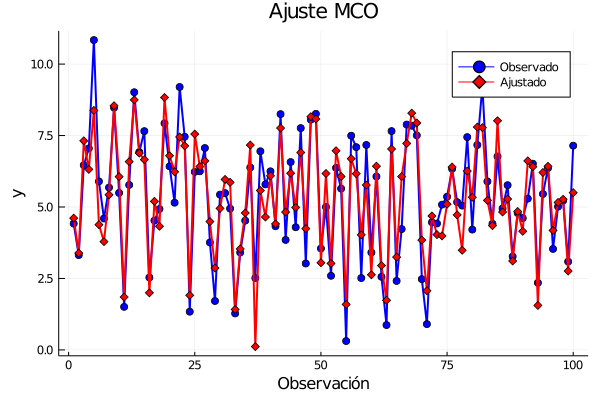

In [18]:
err = y - X*beta
yhat = X*beta
obs = collect(1:N)

plt_yhat = plot(obs,[y yhat], xlabel="Observación", ylabel="y", title = "Ajuste MCO", 
                  color=[:blue :red], label=["Observado" "Ajustado"], legend = true, 
                  linewidth = 2, shape = [:circle :diamond], grid = true)
display(plt_yhat)

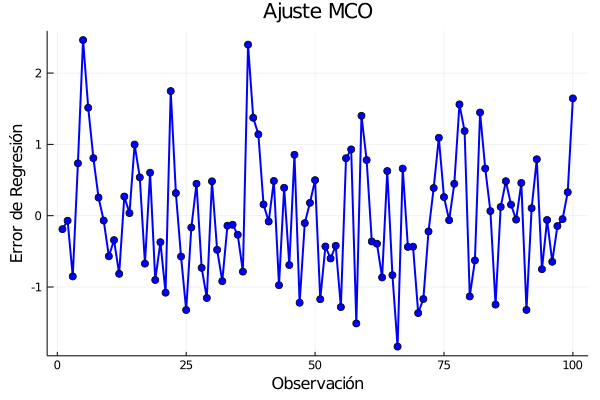

In [19]:
plt_err = plot(obs,err, xlabel="Observación", ylabel="Error de Regresión", title = "Ajuste MCO", 
                  color=[:blue], legend = false, linewidth = 2, shape = [:circle], grid = true)
display(plt_err)